In [1]:
# importing all the necessary libraries

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

import torchdyn as td

from torchdiffeq import odeint


In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchdiffeq import odeint
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Neural network for the Lotka-Volterra system
class LotkaVolterraNDE(nn.Module):
    def __init__(self):
        super(LotkaVolterraNDE, self).__init__()
        self.fc1 = nn.Linear(2, 64) # Input layer (2 for x and y)
        self.fc2 = nn.Linear(64, 64) # Hidden layer
        self.fc3 = nn.Linear(64, 32) # Hidden layer
        self.fc4 = nn.Linear(32, 2) # Output layer (2 for dx/dt and dy/dt)

    def forward(self, t, xy):
        # Forward pass through the network, ignore t since it's not used in this model
        xy = torch.relu(self.fc1(xy))
        xy = torch.relu(self.fc2(xy))
        xy = torch.relu(self.fc3(xy))
        return self.fc4(xy)

# Initialize the model
model = LotkaVolterraNDE()


In [57]:
# Generate some sample data for training (using the true Lotka-Volterra model)
alpha, beta, delta, gamma = 1.0, 0.1, 0.1, 1.0
def true_lotka_volterra(xy0, t=0):

    x,y = xy0.item(), xy0.item()

    return torch.tensor([alpha*x - beta*x*y, delta*x*y - gamma*y])

t = torch.linspace(0, 30, 500) # time points
xy0 = torch.Tensor([5.0, 1.0]) # initial conditions
true_data = odeint(true_lotka_volterra, xy0, t)

true_data

tensor([[ 5.0000e+00,  1.0000e+00],
        [ 5.0018e+00,  9.9820e-01],
        [ 5.0072e+00,  9.9283e-01],
        [ 5.0161e+00,  9.8393e-01],
        [ 5.0285e+00,  9.7155e-01],
        [ 5.0443e+00,  9.5572e-01],
        [ 5.0635e+00,  9.3650e-01],
        [ 5.0861e+00,  9.1393e-01],
        [ 5.1120e+00,  8.8805e-01],
        [ 5.1411e+00,  8.5890e-01],
        [ 5.1735e+00,  8.2652e-01],
        [ 5.2090e+00,  7.9097e-01],
        [ 5.2477e+00,  7.5228e-01],
        [ 5.2895e+00,  7.1049e-01],
        [ 5.3343e+00,  6.6566e-01],
        [ 5.3822e+00,  6.1782e-01],
        [ 5.4330e+00,  5.6702e-01],
        [ 5.4867e+00,  5.1330e-01],
        [ 5.5433e+00,  4.5670e-01],
        [ 5.6027e+00,  3.9728e-01],
        [ 5.6649e+00,  3.3506e-01],
        [ 5.7299e+00,  2.7010e-01],
        [ 5.7976e+00,  2.0243e-01],
        [ 5.8679e+00,  1.3211e-01],
        [ 5.9408e+00,  5.9173e-02],
        [ 6.0163e+00, -1.6336e-02],
        [ 6.0944e+00, -9.4372e-02],
        [ 6.1749e+00, -1.748

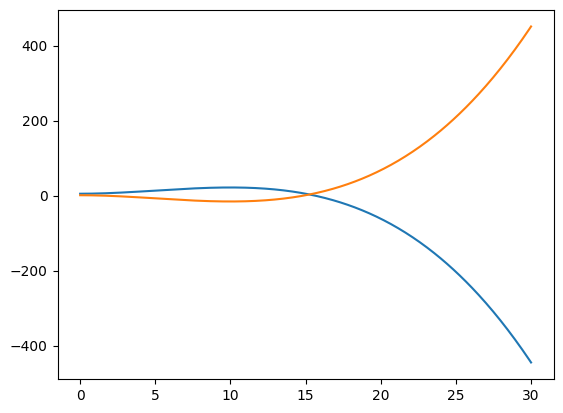

In [58]:
plt.plot(t,true_data)

In [255]:
# Define the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop
for epoch in range(1000):
    optimizer.zero_grad()
    xy_pred = odeint(model, xy0, t)
    loss = torch.mean((xy_pred - true_data)**2)
    loss.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

# Plotting the results
xy_pred = xy_pred.detach().numpy()
true_data = true_data.detach().numpy()
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(t.numpy(), true_data[:, 0], label='True Prey')
plt.plot(t.numpy(), true_data[:, 1], label='True Predator')
plt.title('True Dynamics')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(t.numpy(), xy_pred[:, 0], label='Predicted Prey')
plt.plot(t.numpy(), xy_pred[:, 1], label='Predicted Predator')
plt.title('Predicted Dynamics')
plt.legend()

plt.tight_layout()
plt.show()

Epoch 0, Loss: 18177878.0
Epoch 100, Loss: 16989440.0


KeyboardInterrupt: 